<a href="https://colab.research.google.com/github/masnaashraf/Internship-GRIP/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP:The Sparks Foundation**

---


**#GRIPNOVEMBER22**

**MASNA**

**Data Science and Business Intelligence Intern**

**Task1: Prediction using supervised learning**

*Task: the task is to predict the score of a student if the student studies for 9.25 hours per day.This is a Simple Linear regression problem involving two variable one is dependend (Scores) and the other is independent variable(Hours).*

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading data to data frame from url

#reading data from URL
#Saving URL link to a variable named url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
#reading the csv filefrom the given url
df=pd.read_csv(url)
#printing first 5 records of the data frame
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#EDA(Exploratory Data Analysis)

In [ ]:
#checking the shape of data frame
df.shape
#data frame with 2 coulumns and 25 rows

(25, 2)

In [ ]:
#viewing information regarding data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#describing the data frame
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Data Visualization

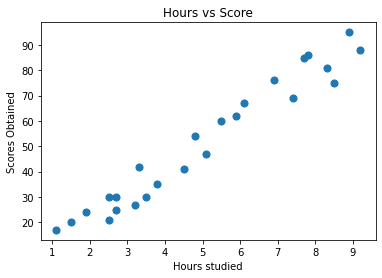

In [ ]:
df.plot.scatter(x="Hours",y="Scores",s=50)
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Scores Obtained")
plt.show()

In [ ]:
#clearly from visualization it is evident that this is a case of positive linear reation between the hours studied and marks obtained

In [ ]:
#finding the correlation between the variables
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#from the correlation value it is also evident that the two variables are positively correlated

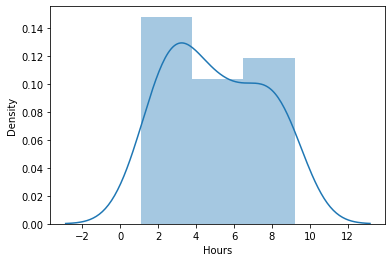

In [ ]:
Hours=df['Hours']
sns.distplot(Hours)
plt.show()

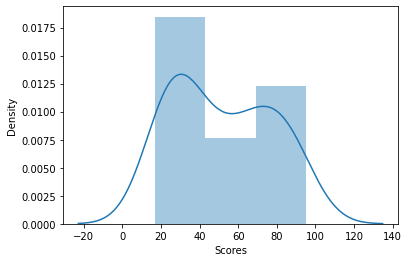

In [ ]:
Scores=df['Scores']
sns.distplot(Scores)
plt.show()

In [ ]:
#Machine Learning

In [ ]:
#spliting data into dependend and independend variables
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [ ]:
print("the independend variable (x) is :\n",x)

the independend variable (x) is :
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print("The dependend variable (y) is:\n",y)

The dependend variable (y) is:
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
#splitting the data into test and train dataset with 80-20 ratio and random state 2
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=2)

print("Training set : %d rows\nTest set : %d rows"%(x_train.shape[0],x_test.shape[0]))

Training set : 20 rows
Test set : 5 rows


In [ ]:
#Training model using Linear Regression

In [ ]:
LinearRegModel=LinearRegression()
model=LinearRegModel.fit(x_train,y_train)
y_predict_train=LinearRegModel.predict(x_train)
y_predict_test=LinearRegModel.predict(x_test)

In [ ]:
model.coef_   #(#m, slope)

array([9.94061514])

In [ ]:
model.intercept_   #(#c, intercept)

1.5079104828268939

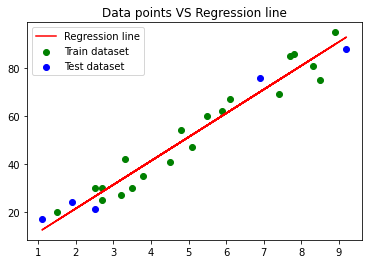

In [ ]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train,c="green",label="Train dataset")
plt.scatter(x_test,y_test,c="blue",label="Test dataset")
plt.plot(x, line,c="red",label="Regression line")
plt.legend()
plt.title("Data points VS Regression line")
plt.show()

In [ ]:
#checking accuracy score of training and testing data set

In [ ]:

print("Train Score:",model.score(x_train,y_train))
print("Test score:",model.score(x_test,y_test))

Train Score: 0.9423348138802985
Test score: 0.9735538080811826


In [ ]:
#Actual vs Predicted value
df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict_test})
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


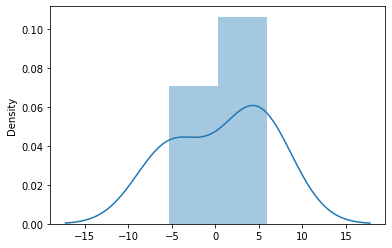

In [ ]:
#plotting thevdifference between the actual value and predicted value
sns.distplot(np.array(y_test-y_predict_test))
plt.show()

In [ ]:
#Model Evaluation Matrics

In [ ]:

r2score=r2_score(y_test,y_predict_test)
mean_abs_error=mean_absolute_error(y_test,y_predict_test)
print("R2 score:",r2score)
print("Mean Absolute Error",mean_abs_error)

R2 score: 0.9735538080811826
Mean Absolute Error 4.877039354964476


In [ ]:
#Since R2 score (Coefficient of Determination) is 97.4% it is well understood that 97% changeability of the dependent output attribute can be explained by the model.
#Mean Absolute error is the average of all errors(Actual value and predicted value) in predicting the value is only 4.877.

In [ ]:
#Now predicting the score when student studies for 9.25 hours per day
print("Score of Student who studied for 9.25 hours per day:",LinearRegModel.predict([[9.25]]))

Score of Student who studied for 9.25 hours per day: [93.45860056]


In [ ]:
#output: Finally predicting that of a student studies for 9.25 hours per day he/she will score 93.458 as score